## Bank Customer Attrition Insights

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: Jan 20 2025

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler  # Add this import

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Bank Customer Attrition Insights/Bank-Customer-Attrition-Insights-Data.csv", encoding='ISO-8859-1')

In [20]:
data.head(3)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15598695    Fields          619    France  Female   42   
1          2    15649354  Johnston          608     Spain  Female   41   
2          3    15737556  Vasilyev          502    France  Female   42   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   

   Point Earned  
0           464  
1           456  
2           377

In [22]:
data.describe().T

count          mean           std          min  \
RowNumber           10000.0  5.000500e+03   2886.895680         1.00   
CustomerId          10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore         10000.0  6.505288e+02     96.653299       350.00   
Age                 10000.0  3.892180e+01     10.487806        18.00   
Tenure              10000.0  5.012800e+00      2.892174         0.00   
Balance             10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts       10000.0  1.530200e+00      0.581654         1.00   
HasCrCard           10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember      10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary     10000.0  1.000902e+05  57510.492818        11.58   
Exited              10000.0  2.038000e-01      0.402842         0.00   
Complain            10000.0  2.044000e-01      0.403283         0.00   
Satisfaction Score  10000.0  3.013800e+00      1.405919         1.00   
Point Earned        10000.0  6.065151e+02    225.924839       119.00   

                            25%           50%           75%          max  
RowNumber               2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId          15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore              584.00  6.520000e+02  7.180000e+02       850.00  
Age                       32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                     3.00  5.000000e+00  7.000000e+00        10.00  
Balance                    0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts              1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard                  0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember             0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary        51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                     0.00  0.000000e+00  0.000000e+00         1.00  
Complain                   0.00  0.000000e+00  0.000000e+00         1.00  
Satisfaction Score         2.00  3.000000e+00  4.000000e+00         5.00  
Point Earned             410.00  6.050000e+02  8.010000e+02      1000.00

## Preprocessing

In [24]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [26]:
# Drop unnecessary columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)


## Data Visualization

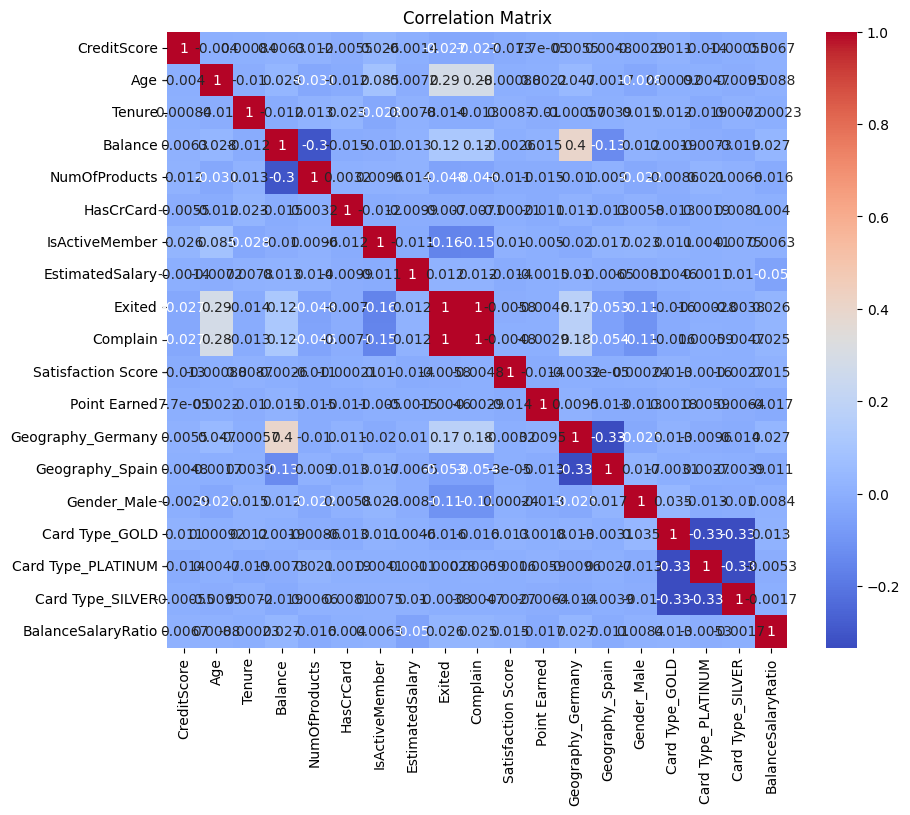

In [75]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

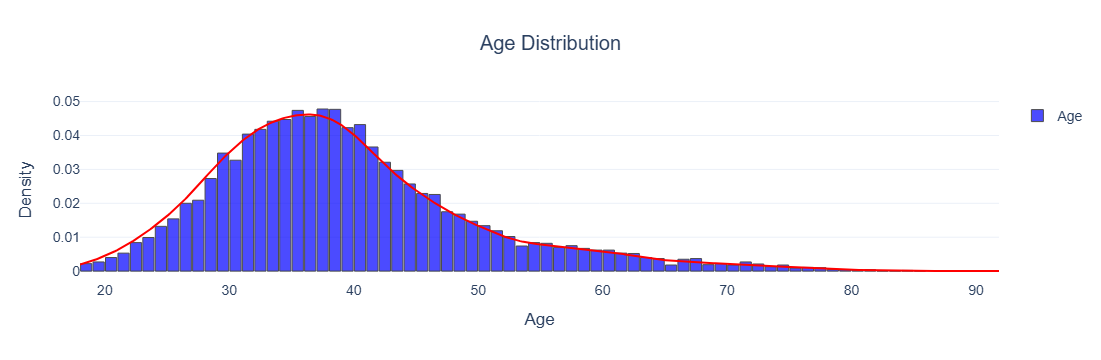

In [34]:
import plotly.figure_factory as ff

# Create the distribution plot with KDE
fig = ff.create_distplot(
    [data['Age'].dropna()],  # Data for the plot (drop NaN values)
    group_labels=['Age'],    # Label for the data
    show_hist=True,          # Show the histogram
    show_rug=False           # Disable rug plot for clarity
)

# Update layout for better readability
fig.update_layout(
    title={
        'text': "Age Distribution",
        'y': 0.9,  # Position of the title
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Age',
    yaxis_title='Density',
    font=dict(
        size=14,  # Increase font size for better readability
        family="Arial, sans-serif"
    ),
    template='plotly_white',  # Clean and professional template
    bargap=0.1                # Reduce gap between bars for better visibility
)

# Customize the KDE line for clarity
fig.data[1].update(line=dict(color='red', width=2), name='KDE')

# Customize histogram for better visual contrast
fig.data[0].update(marker=dict(color='blue', line=dict(color='black', width=1)))

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Create the count plot
fig = px.bar(
    data['Exited'].value_counts().reset_index(),
    x='index',
    y='Exited',
    title='Customer Attrition',
    labels={'index': 'Exited', 'Exited': 'Count'},
    color='index',  # Color by the 'Exited' column
    color_discrete_sequence=px.colors.qualitative.Pastel  # Use a visually pleasing color palette
)

# Customize layout for clarity and aesthetics
fig.update_layout(
    xaxis_title="Exited",
    yaxis_title="Count",
    template="plotly_white",
    font=dict(size=14, family="Arial, sans-serif"),
    showlegend=False  # Hide the legend for simplicity
)

# Show the plot
fig.show()


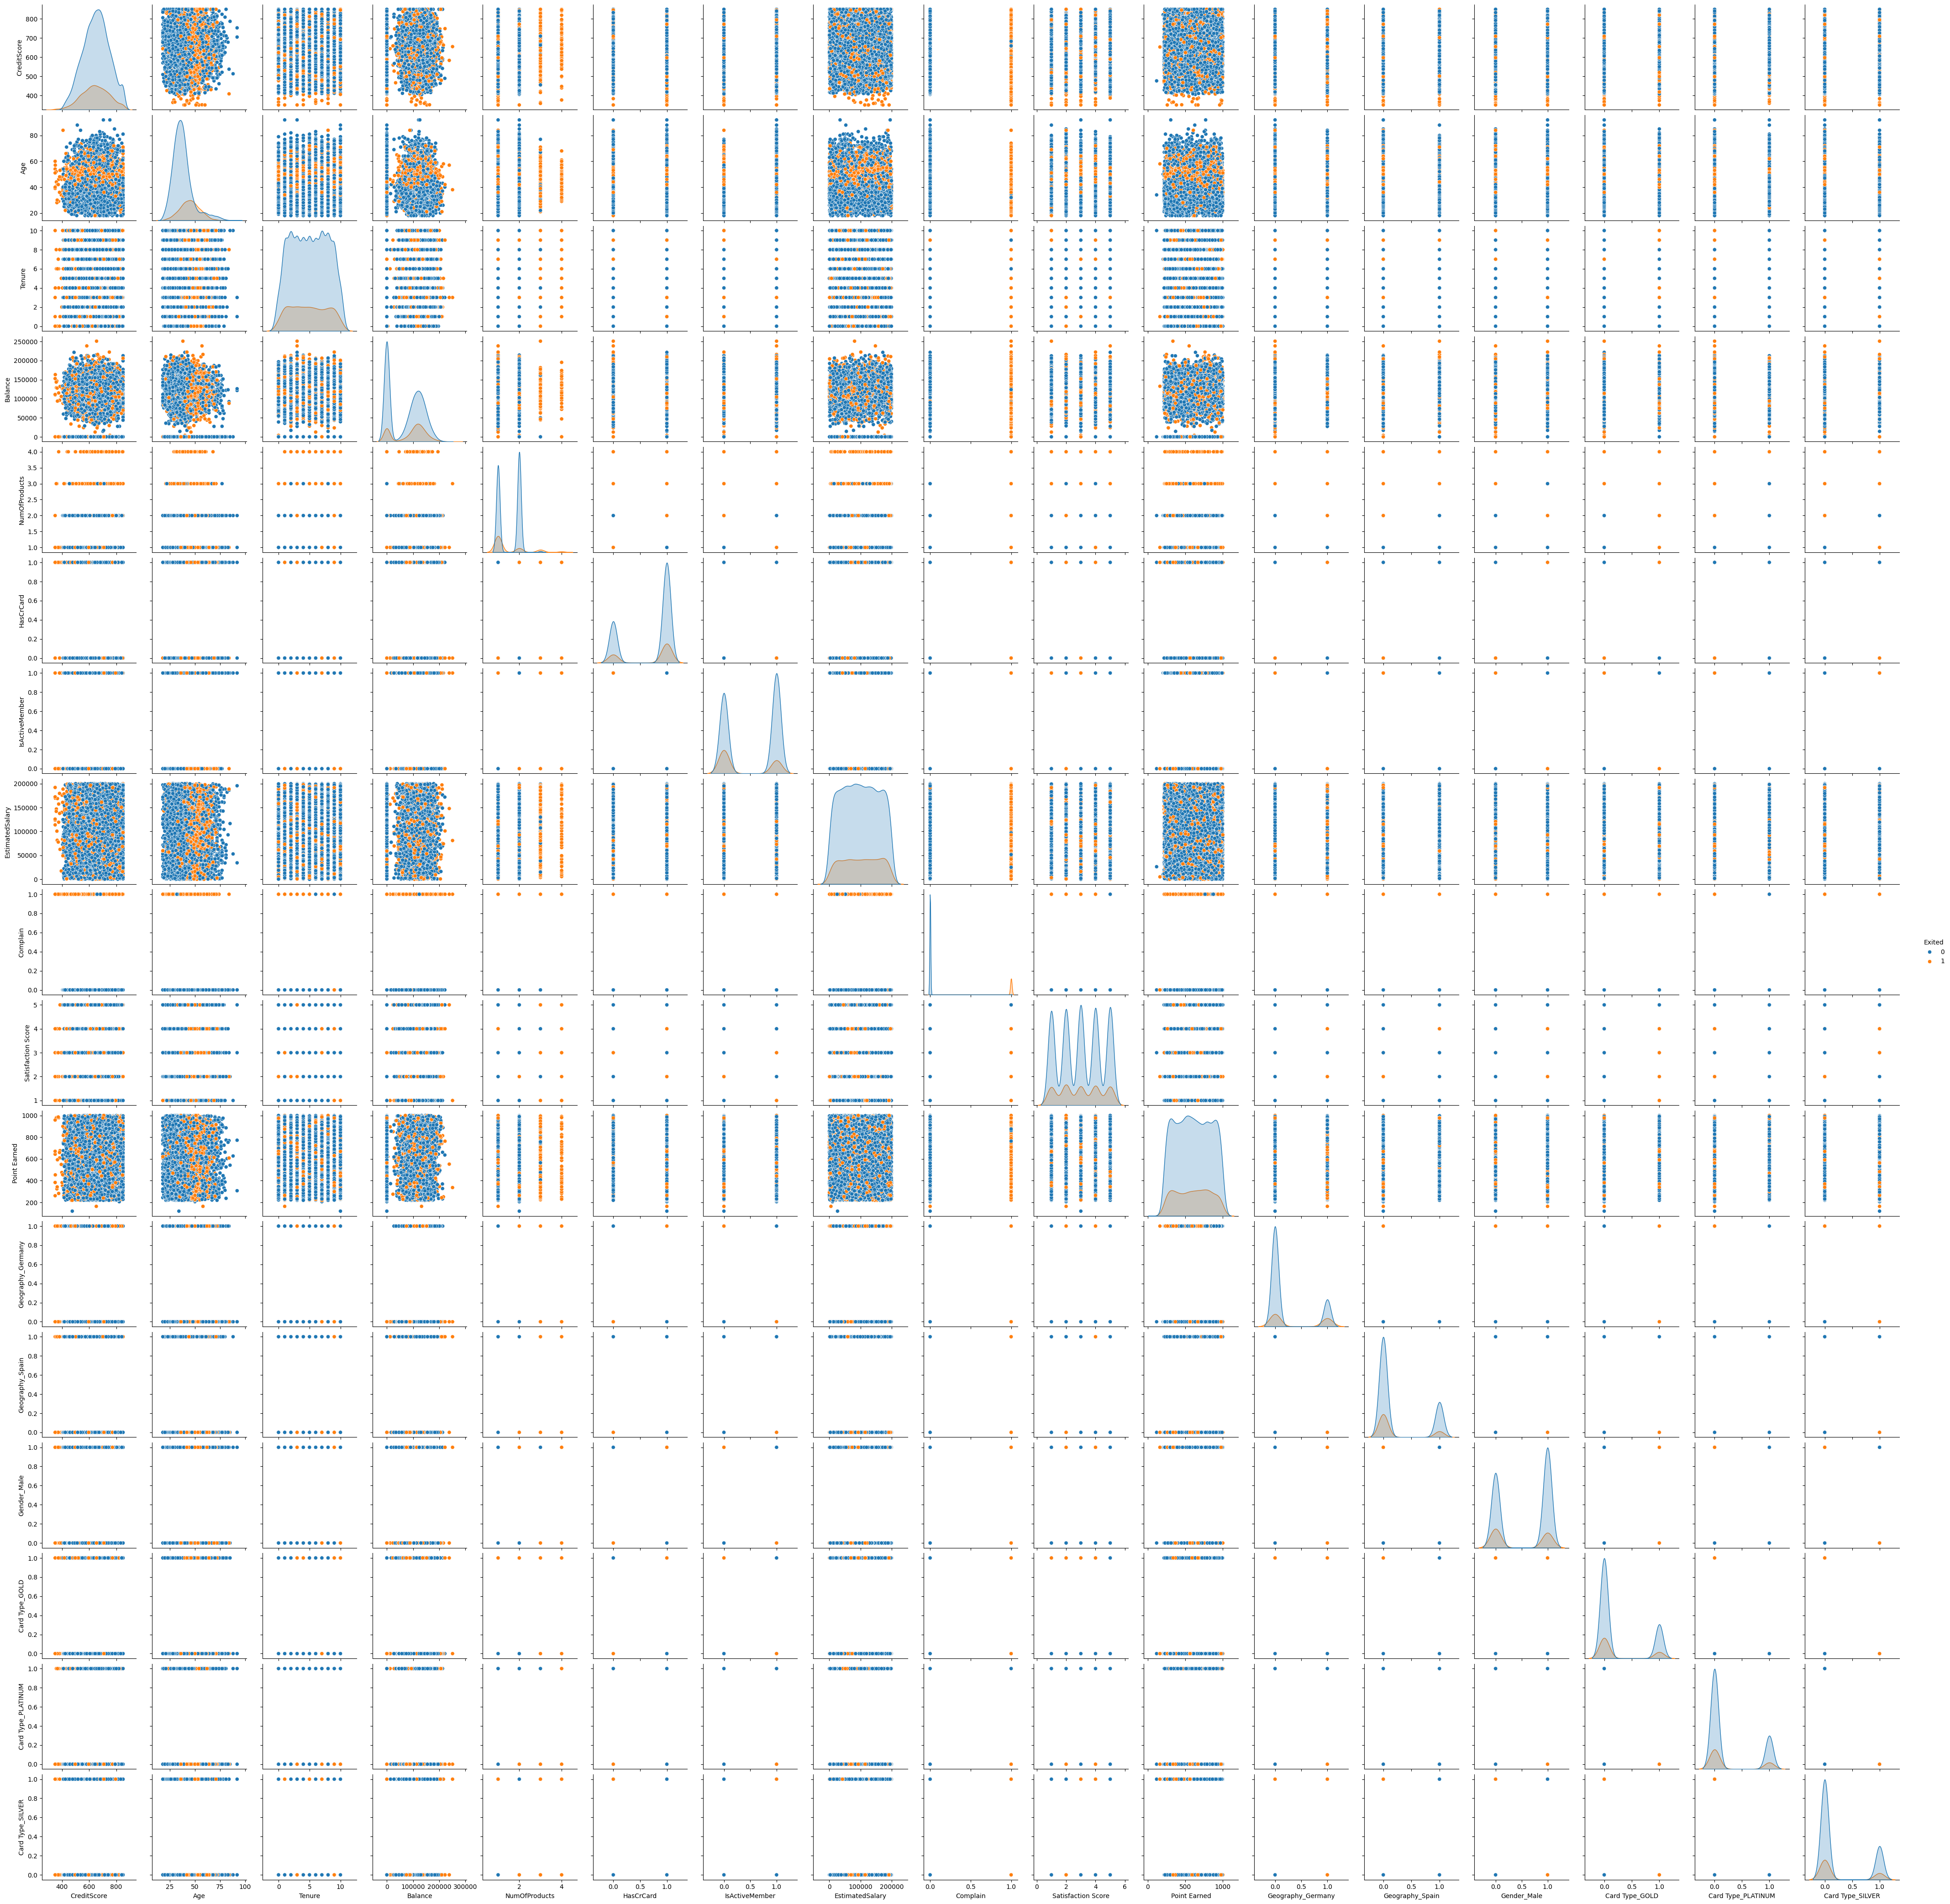

In [36]:
sns.pairplot(data, hue='Exited')
plt.show()

### Feature Engineering

In [46]:
# Example of feature engineering: creating a new feature for balance-to-salary ratio
data['BalanceSalaryRatio'] = data['Balance'] / data['EstimatedSalary']

# Display the first few rows of the dataset with the new feature
data.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Complain  Satisfaction Score  \
0               1        101348.88       1         1                   2   
1               1        112542.58       0         1                   3   
2               0        113931.57       1         1                   3   
3               0         93826.63       0         0                   5   
4               1         79084.10       0         0                   5   

   Point Earned  Geography_Germany  Geography_Spain  Gender_Male  \
0           464              False            False        False   
1           456              False             True        False   
2           377              False            False        False   
3           350              False            False        False   
4           425              False             True        False   

   Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER  BalanceSalaryRatio  
0           False               False             False            0.000000  
1           False               False             False            0.744677  
2           False               False             False            1.401375  
3            True               False             False            0.000000  
4            True               False             False            1.587055

## Train And Test Modele

In [ ]:
# Split the data into training and testing sets
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic Regression

In [52]:
# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Calculate the accuracy score
logreg_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 80.0
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.13       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



## Decision Tree Classification

In [56]:
# Create and train the Decision Tree Classifier
dec_clf = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

# Make predictions
y_pred = dec_clf.predict(X_test)


# Calculate the accuracy score
tree_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print('Decision Tree Classifier accuracy:', dec_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Decision Tree Classifier accuracy: 99.75
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



## Random Forest Classification

In [59]:
# Create and train the Random Forest classifier
rand_clf = RandomForestClassifier(n_estimators=20, criterion="entropy")
rand_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_clf.predict(X_test)

# Calculate the accuracy score
random_forest_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print('Random Forest Classifier accuracy:', rand_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Random Forest Classifier accuracy: 99.9
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



## SVM

In [62]:
# Create and train the SVM model with RBF kernel
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print accuracy and classification report
print('SVM Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

SVM Accuracy:  80.35
Classification Report:               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



## Navie Bayes

In [65]:
# Create and train the Naive Bayes classifier
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

# Make predictions using Naive Bayes model
y_pred = NaiveBayes.predict(X_test)

# Calculate the accuracy score
nb_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print('The accuracy of Naive Bayes is:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

The accuracy of Naive Bayes is: 80.0
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.99      0.89      1607
           1       0.36      0.02      0.04       393

    accuracy                           0.80      2000
   macro avg       0.58      0.51      0.47      2000
weighted avg       0.72      0.80      0.72      2000



## Accuracy Scores 

In [68]:
# Add the model names and accuracy scores to a list
models = ['Random Forest', 'Logistic Regression', 'SVM', 'Decision Tree']
accuracies = [random_forest_accuracy, logreg_accuracy, nb_accuracy, tree_accuracy]

# Create a DataFrame
accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# Display the accuracy scores
print(accuracy_df)

                 Model  Accuracy
0        Random Forest    0.9990
1  Logistic Regression    0.8000
2                  SVM    0.8000
3        Decision Tree    0.9975


## Accuracy Scores Visualization

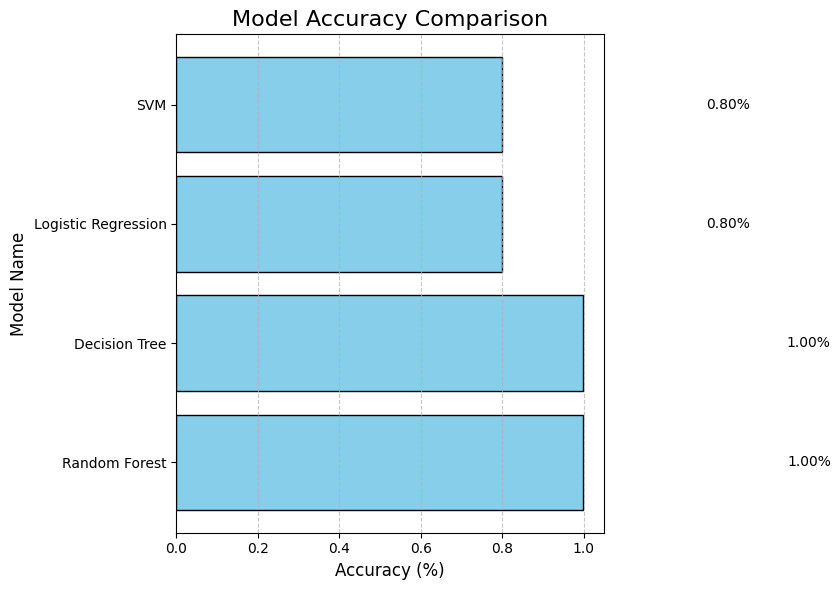

In [71]:
# Sort the data by accuracy for better visualization (optional)
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(
    accuracy_df['Model'], 
    accuracy_df['Accuracy'], 
    color='skyblue', 
    edgecolor='black'
)

# Add accuracy values above the bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.5,  # Position slightly beyond the bar
        bar.get_y() + bar.get_height() / 2,  # Centered on the bar
        f'{bar.get_width():.2f}%',  # Accuracy with 2 decimal places
        va='center'
    )

# Customize the chart
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=12)
plt.ylabel('Model Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


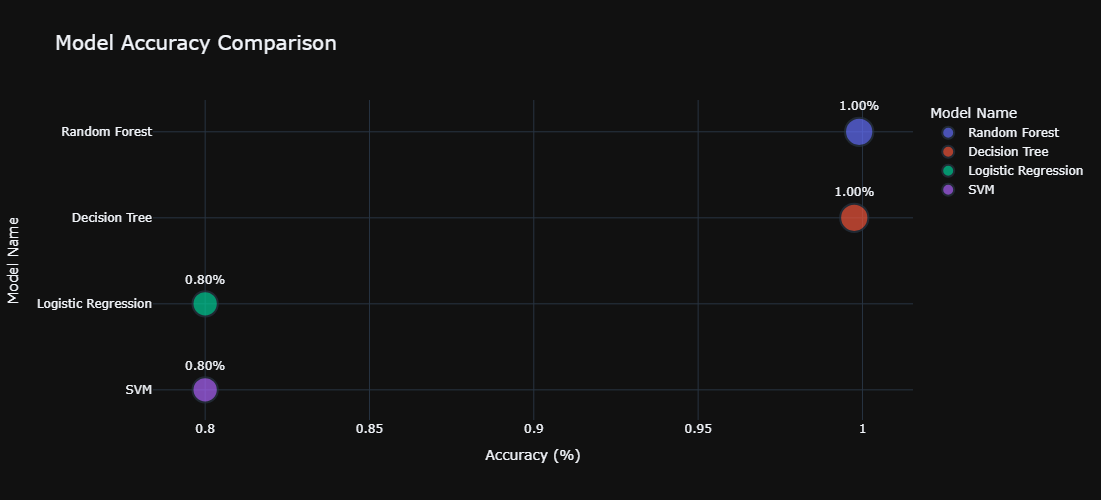

In [73]:
# Create a scatter plot for model accuracies
fig = px.scatter(
    accuracy_df,
    x='Accuracy',  # X-axis: Accuracy
    y='Model',  # Y-axis: Model names
    size='Accuracy',  # Size of the marker proportional to accuracy
    color='Model',  # Color by model for differentiation
    text='Accuracy',
    title='Model Accuracy Comparison',
    labels={'Accuracy': 'Accuracy (%)', 'Model': 'Model Name'}
)

# Update layout for better readability
fig.update_traces(
    marker=dict(line_width=2),  # Thicker marker outlines
    texttemplate='%{text:.2f}%',  # Show accuracy with two decimal points
    textposition='top center'  # Center text above markers
)

# Customize layout for visual clarity
fig.update_layout(
    title_font_size=20,
    xaxis_title='Accuracy (%)',
    yaxis_title='Model Name',
    template='plotly_dark',  # Optional: Use a dark theme
    height=500  # Adjust chart height for better viewing
)

# Show the plot
fig.show()
